In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from seaborn import heatmap
plt.style.use('ggplot')
%matplotlib inline

## Load the Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Normalize the dataset

In [3]:
x_centered = X - X.mean(axis=0)
x_scaled = x_centered / x_centered.std(axis=0)
print("Column-wise mean", x_scaled.mean(axis=0))
print("Column-wise variance", x_scaled.var(axis=0))

Column-wise mean [-1.65238193e-15 -1.86239912e-15 -1.68901929e-15 -1.44254978e-15]
Column-wise variance [1. 1. 1. 1.]


## Find the Covariance matrix

In [4]:
np.cov?

In [5]:
C = np.cov(x_scaled.T)
C

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [6]:
cdf = pd.DataFrame(C, index=iris.feature_names, columns=iris.feature_names)
cdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


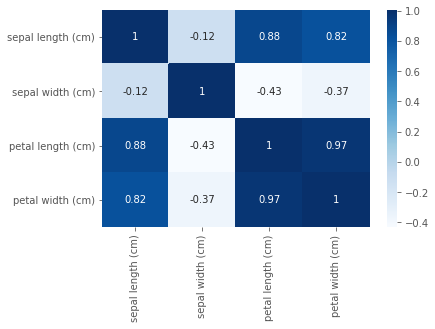

In [7]:
heatmap(cdf, annot=True, cmap=plt.cm.Blues)

## Get the Eigenvalues & eigenvectors of the covariace matrix

In [8]:
np.linalg.eig?

In [9]:
w, v = np.linalg.eig(C)
w

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [10]:
ix = np.argsort(w)[::-1]
v_sorted = v[:, ix]

## Select the number of components to keep

In [13]:
N = 2

## Project the data onto the principal components

In [11]:
v_inv = np.linalg.pinv(v_sorted)

In [14]:
x_lr = np.dot(v_inv, x_scaled.T).T
x_lr_reduced = x_lr[:, :N]

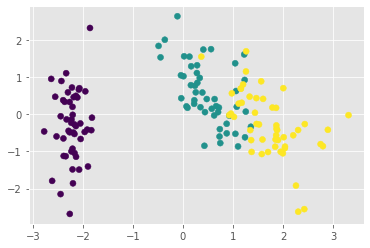

In [15]:
plt.scatter(x_lr_reduced[:, 0], x_lr_reduced[:, 1], c=y)

# Automate PCA with sklearn

In [16]:
pca = PCA()
x_lr = pca.fit_transform(X)

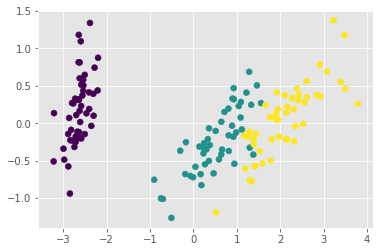

In [17]:
plt.scatter(x_lr[:, 0], x_lr[:, 1], c=y)

## Variance of each component - Scree Plots

Text(0, 0.5, 'Variance')

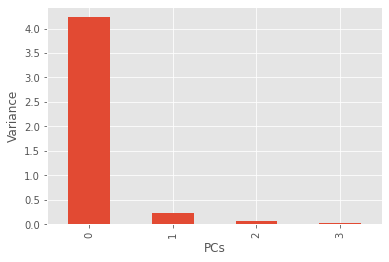

In [18]:
pd.Series(pca.explained_variance_).plot(kind='bar')
plt.xlabel('PCs')
plt.ylabel('Variance')

Text(0, 0.5, 'Ratio of variance')

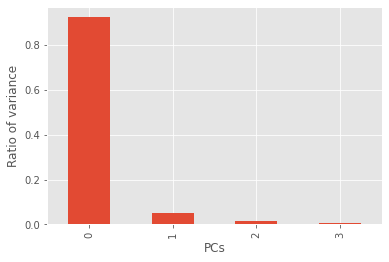

In [19]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('PCs')
plt.ylabel('Ratio of variance')

Text(0, 0.5, 'Cumulative Variance Ratio')

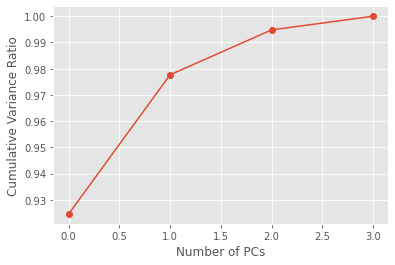

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio')

## Biplot

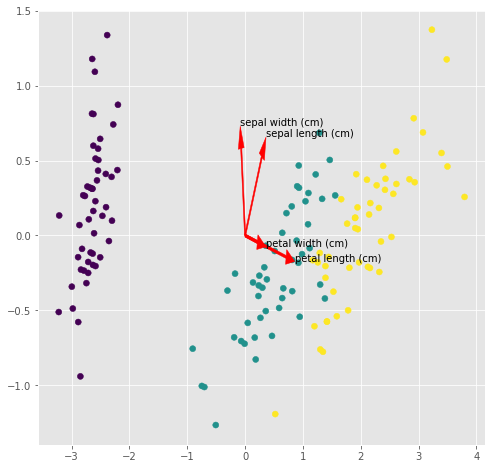

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_lr[:, 0], x_lr[:, 1], c=y)
components = pca.components_
sv = pca.singular_values_
for i, feat in enumerate(iris.feature_names):
    xx, yy = components[:2, i] # * sv[i]
    ax.arrow(0, 0, xx, yy, color='r', width=0.02 ,length_includes_head=True, head_width=0.1)
    ax.text(xx, yy, feat)

# Exercise: Try PCA on the Breast Cancer dataset (given below):
## 1. Find the number of PCs required to get > 99% variance
## 2. Plot the top 2 PCs

In [22]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc.data
y = bc.target
df = pd.DataFrame(X, columns=bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
pca = PCA()
x_red = pca.fit_transform(X)

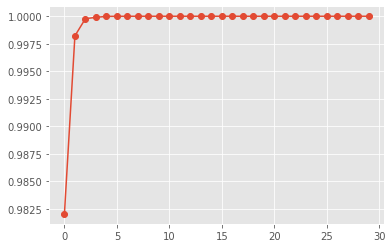

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')

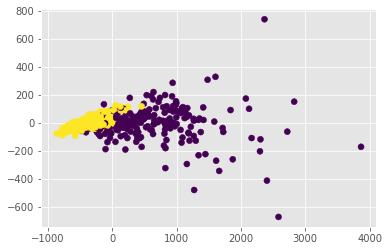

In [30]:
plt.scatter(x_red[:, 0], x_red[:, 1], c=y)